# Replication of Lab 3: "Analyzing RCT data with Precision Adjustment"

# Group 6

Members:
1. Eljaer Eusebio
2. Claudia Vivas
3. Luis Sandoval
4. Andre Tapia

# QUESTION 1

### MULTICOLINEARITY

We talk about multicollinearity when independent variables of some linear regresion have a high correlation between each one. The results could be biased to the analysis, so the model has a problem. Two cases arise form multicollinearity: Perfect Multicolinearity and Imperfect Multicollinearity. In the first case, it happens when two or more regressors X have a linear and exact relationship between each one , which breaks one of the linear regresion's assumption.

For example: 
We relate food expenditure to family income, which is labor income and labor not-labor income. First one is related with labor supply and salary. In the other case, it is related with income not neccesarily to family (banks transferes, rental income, pensions). Therefore, earned income and unearned income are expected to affect spending. But, if we add total income on the linear regression:

$$
Galim_i = \beta_1 + \beta_2 LaborIncome_i + \beta_3 NotLaborIncome_i + \beta_4 TotalIncome_i + \varepsilon_i
$$

We Know 

$$
 LaborIncome_i + NotLaborIncome_i = TotalIncome_i 
$$

In this case the number of regressors(K) es equal 4, but the range ($X$) is 3. So, the order of matrix $XX'$ is 4x4 but its range in low. In this case, We can't get ${\beta}^~$ because doesn't exist ${XX'}^-1$.

The problem is that "Total income" did not give us more information than "Earnings from work" and "Income from non-work." It is redundant information, so it is necessary to delete it.


About Imperfect Multicollinearity, the relantionship between explanatory variables is strong but not perfectly linear like the first case.

For example:
We wish to explain the relantionship between consume and incomes plus wealth. Following the next model

$$
 Consume_i = \beta_1 + \beta_2 Income_i + \beta_3 Wealth_i + \varepsilon_i
$$

The probability of having high correlation between "Income" and "Wealth" exist. If we focus on high-income households, it is very likely that they have significant accumulated wealth. But the relationship is not perfect because it is possible for someone to have low income but high wealth, and vice versa.

In [15]:
### Creating Matrix
n=6
p=10

X=matrix(rnorm(n*p), ncol= 6, nrow=10)

n_1=1
p_1=10

Y= matrix(rnorm(n_1*p_1), ncol= 1, nrow=10)
n_2=1
p_2=10

Z= matrix(rnorm(n_2*p_2), ncol= 1, nrow=10)
n_3=1
p_3=10

W= matrix(rnorm(n_3*p_3), ncol= 1, nrow=10)

A= 2*Y+3*Z+W 

data <-cbind(X,Y,Z,W,A)

head(data)


0.7750798,-1.844462888,0.779233479,1.6906699,-0.1677795,0.5208771,-0.17547342,0.08844013,-0.6076255,-0.693252
0.7370117,-1.242727520,-0.001991027,0.1896530,0.4073103,0.4986310,-1.22963484,-1.45518048,-0.4849894,-7.309800
1.2830593,0.394654390,-1.272418882,0.2295922,-0.3293975,0.3123495,-1.35397597,-0.92699269,0.3899773,-5.098953
-0.1666917,0.002062498,-0.415388023,1.5519211,0.8196925,1.4829149,-0.01926601,-0.97577271,-1.8122171,-4.778067
1.8056324,-0.907127813,-0.294010198,-1.1726937,-1.6518163,1.4132186,-0.02325289,-0.26110889,0.9796855,0.149853
0.1094815,-2.143187448,-1.243301439,-0.8556771,-1.4535127,-0.3455278,0.55434321,0.65751878,0.7500170,3.831260


In [16]:
X

0.7750798,-1.844462888,0.779233479,1.69066986,-0.1677795,0.5208771
0.7370117,-1.242727520,-0.001991027,0.18965296,0.4073103,0.4986310
1.2830593,0.394654390,-1.272418882,0.22959222,-0.3293975,0.3123495
-0.1666917,0.002062498,-0.415388023,1.55192106,0.8196925,1.4829149
1.8056324,-0.907127813,-0.294010198,-1.17269374,-1.6518163,1.4132186
0.1094815,-2.143187448,-1.243301439,-0.85567706,-1.4535127,-0.3455278
0.8110007,1.324003351,0.558280763,-1.00800597,0.3452509,0.3162607
1.5442774,0.193577251,-0.430049455,-0.64277996,1.5990602,0.5205143
1.5944311,0.537598964,-1.561006519,1.29059185,-0.4027611,0.9046237
-1.1348317,-0.570012470,-0.512475933,-0.05644147,-0.9152693,0.1889349


In [17]:
Y

-0.175473425
-1.229634837
-1.353975970
-0.019266012
-0.023252888
0.554343206
-1.323534411
-0.004015112
-0.933596779
1.650224384


In [18]:
Z

0.08844013
-1.45518048
-0.92699269
-0.97577271
-0.26110889
0.65751878
0.22792104
0.90053975
-0.24113320
0.71205037


In [19]:
W

-0.6076255
-0.4849894
0.3899773
-1.8122171
0.9796855
0.7500170
-0.3510174
-0.6661143
0.6121287
0.8130444


In [20]:
A

-0.693252
-7.309800
-5.098953
-4.778067
0.149853
3.831260
-2.314323
2.027475
-1.978464
6.249644


In [21]:
data

0.7750798,-1.844462888,0.779233479,1.69066986,-0.1677795,0.5208771,-0.175473425,0.08844013,-0.6076255,-0.693252
0.7370117,-1.242727520,-0.001991027,0.18965296,0.4073103,0.4986310,-1.229634837,-1.45518048,-0.4849894,-7.309800
1.2830593,0.394654390,-1.272418882,0.22959222,-0.3293975,0.3123495,-1.353975970,-0.92699269,0.3899773,-5.098953
-0.1666917,0.002062498,-0.415388023,1.55192106,0.8196925,1.4829149,-0.019266012,-0.97577271,-1.8122171,-4.778067
1.8056324,-0.907127813,-0.294010198,-1.17269374,-1.6518163,1.4132186,-0.023252888,-0.26110889,0.9796855,0.149853
0.1094815,-2.143187448,-1.243301439,-0.85567706,-1.4535127,-0.3455278,0.554343206,0.65751878,0.7500170,3.831260
0.8110007,1.324003351,0.558280763,-1.00800597,0.3452509,0.3162607,-1.323534411,0.22792104,-0.3510174,-2.314323
1.5442774,0.193577251,-0.430049455,-0.64277996,1.5990602,0.5205143,-0.004015112,0.90053975,-0.6661143,2.027475
1.5944311,0.537598964,-1.561006519,1.29059185,-0.4027611,0.9046237,-0.933596779,-0.24113320,0.6121287,-1.978464
-1.1348317,-0.570012470,-0.512475933,-0.05644147,-0.9152693,0.1889349,1.650224384,0.71205037,0.8130444,6.249644


In [22]:
Inv_data <- solve.default (data)
Inv_data

ERROR: Error in solve.default(data): sistema es computacionalmente singular: número de condición recíproco = 4.14576e-18


#### Comentaries:
If we tried to inverse matrix of "data", R shows us an error message .Because vector 10 is a linear combination of vector Y, Z and W. Also, it has 0 as a determinant, it is not posible to change the matrix. R-studio hasn't package to aproximate the inverse of matrix. Nevertheless, this is not the case for Python since this program can solve an inverse matrix with multicollinearity.

# QUESTION 2

## Data

In this lab, we analyze the Pennsylvania re-employment bonus experiment, which was previously studied in "Sequential testing of duration data: the case of the Pennsylvania ‘reemployment bonus’ experiment" (Bilias, 2000), among others. These experiments were conducted in the 1980s by the U.S. Department of Labor to test the incentive effects of alternative compensation schemes for unemployment insurance (UI). In these experiments, UI claimants were randomly assigned either to a control group or one of five treatment groups. Actually, there are six treatment groups in the experiments. Here we focus on treatment group 4, but feel free to explore other treatment groups. In the control group the current rules of the UI applied. Individuals in the treatment groups were offered a cash bonus if they found a job within some pre-specified period of time (qualification period), provided that the job was retained for a specified duration. The treatments differed in the level of the bonus, the length of the qualification period, and whether the bonus was declining over time in the qualification period; see http://qed.econ.queensu.ca/jae/2000-v15.6/bilias/readme.b.txt for further details on data. 
  

#### We focus on the second treatment group

In [4]:
## loading the data
Penn <- as.data.frame(read.table("../data/penn_jae.dat", header=T ))
n <- dim(Penn)[1]  
p_1 <- dim(Penn)[2] 
Penn<- subset(Penn, tg==2 | tg==0) 
attach(Penn)

In [3]:
summary(Penn)

      abdt             tg            inuidur1        inuidur2    
 Min.   :10404   Min.   :0.0000   Min.   : 1.00   Min.   : 0.00  
 1st Qu.:10600   1st Qu.:0.0000   1st Qu.: 3.00   1st Qu.: 2.00  
 Median :10698   Median :0.0000   Median :11.00   Median :10.00  
 Mean   :10696   Mean   :0.8398   Mean   :13.03   Mean   :12.25  
 3rd Qu.:10796   3rd Qu.:2.0000   3rd Qu.:25.00   3rd Qu.:23.00  
 Max.   :10880   Max.   :2.0000   Max.   :52.00   Max.   :52.00  
     female           black           hispanic          othrace        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.000000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.000000  
 Median :0.0000   Median :0.0000   Median :0.00000   Median :0.000000  
 Mean   :0.4007   Mean   :0.1188   Mean   :0.03632   Mean   :0.005189  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.000000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000   Max.   :1.000000  
      dep               q1        

In [5]:
T2<- (tg==2) 
summary(T2)

   Mode   FALSE    TRUE 
logical    3354    2428 

In [5]:
head(Penn)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
1,10824,0,18,18,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,1,0
2,10635,2,7,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,10824,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,10831,0,27,27,0,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0


In [6]:
dim(Penn)

[1] 5782   23

#### We create two histograms to see the distribution of the outcome for the treatment and control group. 

### Control Group

In [7]:
control <-subset(Penn, tg == 0)

In [8]:
dim(control)

[1] 3354   23

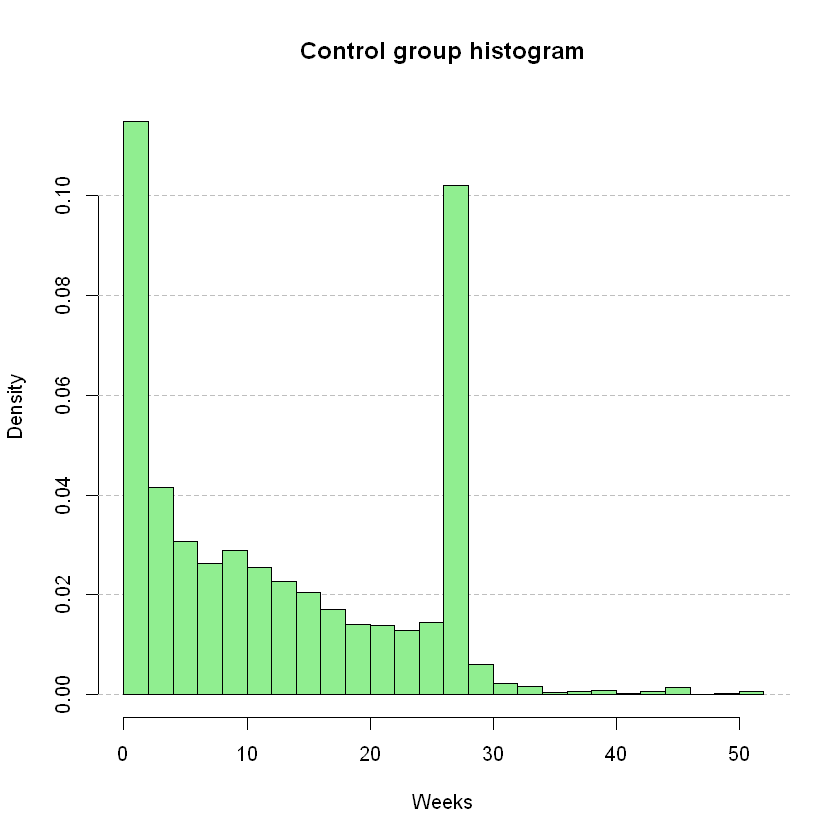

In [9]:
outcome1 <- control$inuidur1
hist(outcome1, main="Control group histogram", xlab="Weeks",freq = FALSE, col = "lightgreen", breaks = 20)
grid(nx = NA, ny = NULL, lty = 2, col = "gray", lwd = 1)
hist(outcome1, main="Control group histogram", xlab="Weeks", freq = FALSE, col = "lightgreen", breaks = 20, add=TRUE)

This graphic show us that there were more than $10\%$  of control's people whom took only one week to find a job.Adittionally, there were almost $10\%$ of treatment's people to whom took between 26-28 weeks to find a job.Therefore, there were very few people (less than  1% ) who took between 30 and 40 weeks to find a job. Finally, everyone else took between 5 and 25 weeks to find a job.

### Treatment group

In [10]:
treatment <-subset(Penn, tg == 2)

In [11]:
dim(treatment)

[1] 2428   23

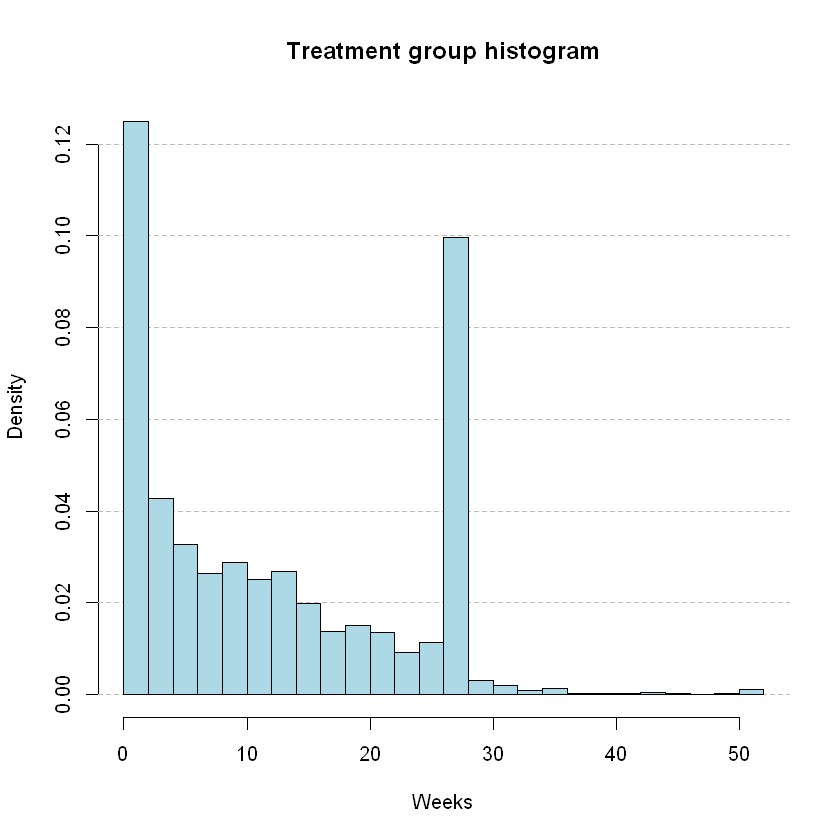

In [12]:
outcome_t <- treatment$inuidur1
hist(outcome_t, main="Treatment group histogram", xlab="Weeks", freq = FALSE, col = "lightblue", breaks = 20)
grid(nx = NA, ny = NULL, lty = 2, col = "gray", lwd = 1)
hist(outcome_t, main="Treatment group histogram", xlab="Weeks", freq = FALSE, col = "lightblue", breaks = 20, add=TRUE)

This graphic show us that there were more than $12\%$ of treatment's people whom took only one week to find a job.
Adittionally, there were almost $10\%$ of treatment's people to whom took between 26-28 weeks to find a job.
Therefore, there were very few people (less than $1\%$) who took between 30 and 40 weeks to find a job.
Finally, everyone else took between 5 and 25 weeks to find a job.

The distribution of the $inuidur1$ variable is quite similar for the treatment and control groups.  This means that the treatment did not have a differential effect on unemployment, this could be explained by the external influence of the covariates.  

### Model 
To evaluate the impact of the treatments on unemployment duration, we consider the linear regression model:

$$
Y =  D \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is  the  log of duration of unemployment, $D$ is a treatment  indicators,  and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation.   Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously.


We also consider interactive regression model:

$$
Y =  D \alpha_1 + D W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W', DW')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient $\beta_1$ has
the interpretation of the causal effect of the treatment on
the average outcome. We thus refer to $\beta_1$ as the average
treatment effect (ATE). Note that the covariates, here are
independent of the treatment $D$, so we can identify $\beta_1$ by
just linear regression of $Y$ on $D$, without adding covariates.
However we do add covariates in an effort to improve the
precision of our estimates of the average treatment effect.

### Analysis

We consider 

*  classical 2-sample approach, no adjustment (CL) TOMO EL PROMEDIO DE LOS NO TRATADOS VS LOS TRATADOS
*  classical linear regression adjustment (CRA) REGRESIONAMOS EL MODELO PERO AJUSTADO CON UNA CO VARIABLES
*  interactive regression adjusment (IRA) AGREGO INTRACCION CON LOS POSIBLES EFECTOS HETEROGENEOS QUE SE GENERAN DE LA RELACION ENTRE TRATAMIENTO Y COVARIABLES

and carry out robust inference using the *estimatr* R packages. 

# Carry out covariate balance check

This is done using "lm_robust" command which unlike "lm" in the base command automatically does the correct Eicher-Huber-White standard errors, instead othe classical non-robus formula based on the homoscdedasticity command.

In [1]:
#install.packages("lmtest")

package 'lmtest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'lmtest'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\sniff\anaconda3\envs\cuine\Lib\R\library\00LOCK\lmtest\libs\x64\lmtest.dll  a C:\Users\sniff\anaconda3\envs\cuine\Lib\R\library\lmtest\libs\x64\lmtest.dll: Permission denied"Warning message:
"restored 'lmtest'"


The downloaded binary packages are in
	C:\Users\sniff\AppData\Local\Temp\RtmpqgyWCF\downloaded_packages


In [6]:
m <- lm(T2~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2) 
library(lmtest)
library(sandwich)
coeftest(m, vcov = vcovHC(m, type="HC1"))

Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           0.5171342  0.1568823  3.2963 0.0009856 ***
female                0.0056240  0.1324597  0.0425 0.9661352    
black                -0.0307771  0.0847262 -0.3633 0.7164293    
othrace              -0.4278818  0.3005502 -1.4237 0.1545993    
factor(dep)1          0.1576567  0.1851798  0.8514 0.3945992    
factor(dep)2         -0.1927958  0.1508926 -1.2777 0.2014067    
q2                   -0.1092161  0.1583768 -0.6896 0.4904762    
q3                   -0.1075663  0.1579864 -0.6809 0.4959890    
q4                   -0.0621302  0.1581168 -0.3929 0.6943797    
q5                   -0.0498684  0.1575034 -0.3166 0.7515450    
q6                   -0.2176336  0.1558290 -1.3966 0.1625831    
agelt35              -0.0643464  0.1326376 -0.4851 0.6276032    
agegt54               0.0259251  0.2395371  0.1082 0.9138171    
durable              -0.1256397  0.1763853 -0.7123 0.4763064    

We see that that even though this is a randomized experiment, balance conditions are failed.

In [66]:
# get same dataframe
X <- as.data.frame( model.matrix(m) )

no_col <- attributes(m$coefficients)$names[is.na(m$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]

save( X1, file = ".../data/m_reg.RData")

# Model Specification

### Classical 2-sample approach, no adjustment (CL) and  classical linear regression adjustment (CRA)

In [7]:
# model specifications


# no adjustment (2-sample approach)
formula_cl <- log(inuidur1)~T2 

# adding controls
formula_cra <- log(inuidur1)~T2+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2
# Omitted dummies: q1, nondurable, muld


ols.cl_reg <- lm(formula_cl)
ols.cra_reg <- lm(formula_cra)


ols.cl = coeftest(ols.cl_reg, vcov = vcovHC(ols.cl_reg, type="HC1")) 
ols.cra = coeftest(ols.cra_reg, vcov = vcovHC(ols.cra_reg, type="HC1"))

print(ols.cl)
print(ols.cra)



t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.056830   0.020954 98.1580  < 2e-16 ***
T2TRUE      -0.078825   0.032509 -2.4247  0.01535 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           2.4471832  0.3580899  6.8340 9.123e-12 ***
T2TRUE               -0.0712066  0.0320440 -2.2222 0.0263124 *  
female               -0.9428048  0.2827961 -3.3339 0.0008620 ***
black                -0.6654258  0.2430567 -2.7377 0.0062056 ** 
othrace              -1.5494550  0.7312071 -2.1190 0.0341306 *  
factor(dep)1          0.2798498  0.3783316  0.7397 0.4595160    
factor(dep)2          0.1678164  0.3678718  0.4562 0.6482768    
q2                    0.0271228  0.3606226  0.0752 0.9400495    
q3                   -0.3542370  0.3601780 -0.9835 0.3254005    
q4                   -0.3380244  0.3606994 -0.9371 0.3487284    
q5 

The interactive specificaiton corresponds to the approach introduced in Lin (2013).

In [71]:
# get same dataframe for ols.cl
X <- as.data.frame( model.matrix(ols.cl_reg) )

no_col <- attributes(ols.cl_reg$coefficients)$names[is.na(ols.cl_reg$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]

save( X1, file = ".../data/ols_cl_reg.RData")

# get same dataframe for ols.cl
X <- as.data.frame( model.matrix(ols.cra_reg) )

no_col <- attributes(ols.cra_reg$coefficients)$names[is.na(ols.cra_reg$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]

save( X1, file = ".../data/ols_cra_reg.RData")

### Interactive regression adjustment (IRA)

In [8]:
#interactive regression model;

X = model.matrix (~ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)[,-1] #creamos interacciones
dim(X)
demean<- function(x){ x - mean(x)} 
X = apply(X, 2, demean) 

ols.ira_reg = lm(log(inuidur1) ~ T2*X) 
ols.ira= coeftest(ols.ira_reg, vcov = vcovHC(ols.ira_reg, type="HC1"))
print(ols.ira)


[1] 5782  119


t test of coefficients:

                               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                   2.0556976  0.0207138 99.2430 < 2.2e-16 ***
T2TRUE                       -0.0699044  0.0320764 -2.1793 0.0293503 *  
Xfemale                      -0.6662823  0.4080234 -1.6330 0.1025357    
Xblack                       -0.8634862  0.2969435 -2.9079 0.0036528 ** 
Xothrace                     -3.8176881  0.9366193 -4.0760 4.645e-05 ***
Xfactor(dep)1                 0.0359264  0.6476816  0.0555 0.9557666    
Xfactor(dep)2                 0.2117556  0.4512231  0.4693 0.6388790    
Xq2                          -0.2546436  0.4553391 -0.5592 0.5760207    
Xq3                          -0.6212326  0.4549639 -1.3655 0.1721653    
Xq4                          -0.4799269  0.4561206 -1.0522 0.2927566    
Xq5                          -0.3718675  0.4538882 -0.8193 0.4126542    
Xq6                          -0.6770474  0.4521499 -1.4974 0.1343469    
Xagelt35                 

In [73]:
# get same dataframe for ols.ira
S <- as.data.frame( model.matrix(ols.ira_reg) )

no_col <- attributes(ols.ira_reg$coefficients)$names[is.na(ols.ira_reg$coefficients)]

S1  <- S[, -which(names( S ) %in% no_col ) ]

save( S1, file = ".../data/ols_ira_reg.RData")

Next we try out partialling out with lasso

### Interactive regression adjustment (IRA) using Lasso

In [9]:
library(hdm)

T2 = demean(T2)

DX = model.matrix(~T2*X)[,-1]

rlasso.ira = summary(rlassoEffects(DX, log(inuidur1), index = 1)) 

print(rlasso.ira)


[1] "Estimates and significance testing of the effect of target variables"
   Estimate. Std. Error t value Pr(>|t|)  
T2  -0.07457    0.03209  -2.324   0.0201 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




In [75]:
# getting data
S = as.data.frame(DX)
save( S, file = ".../data/rlasso_ira_reg.RData")

### Results

In [10]:
str(ols.ira)
ols.ira[2,1]

 'coeftest' num [1:203, 1:4] 2.0557 -0.0699 -0.6663 -0.8635 -3.8177 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:203] "(Intercept)" "T2TRUE" "Xfemale" "Xblack" ...
  ..$ : chr [1:4] "Estimate" "Std. Error" "t value" "Pr(>|t|)"
 - attr(*, "method")= chr "t test of coefficients"
 - attr(*, "df")= int 5579
 - attr(*, "nobs")= int 5782
 - attr(*, "logLik")=Class 'logLik' : -9129 (df=204)


[1] -0.0699044

In [11]:
library(xtable)
table<- matrix(0, 2, 4)
table[1,1]<-  ols.cl[2,1]
table[1,2]<-  ols.cra[2,1]
table[1,3]<-  ols.ira[2,1]
table[1,4]<-  rlasso.ira[[1]][1]

table[2,1]<-  ols.cl[2,2]
table[2,2]<-  ols.cra[2,2]
table[2,3]<-  ols.ira[2,2]
table[2,4]<-  rlasso.ira[[1]][2]


colnames(table)<- c("CL","CRA","IRA", "IRA w Lasso")
rownames(table)<- c("estimate", "standard error")
tab<- xtable(table, digits=5)
tab

print(tab, type="latex", digits=5)

,CL,CRA,IRA,IRA w Lasso
estimate,-0.07882533,-0.07120664,-0.06990440,-0.07457328
standard error,0.03250889,0.03204403,0.03207638,0.03208892


% latex table generated in R 3.6.1 by xtable 1.8-4 package
% Fri Sep 24 16:31:46 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & CL & CRA & IRA & IRA w Lasso \\ 
  \hline
estimate & -0.07883 & -0.07121 & -0.06990 & -0.07457 \\ 
  standard error & 0.03251 & 0.03204 & 0.03208 & 0.03209 \\ 
   \hline
\end{tabular}
\end{table}


Treatment group 2 experiences an average decrease of about $7.8\%$ in the length of unemployment spell.


Observe that regression estimators delivers estimates that are slighly more efficient (lower standard errors) than the simple 2 mean estimator, but essentially all methods have very similar standard errors. From IRA results we also see that there is not any statistically detectable heterogeneity.  We also see the regression estimators offer slightly lower estimates -- these difference occur perhaps to due minor imbalance in the treatment allocation, which the regression estimators try to correct.




In particular, observe that classical linear regression adjustment (CRA) delivers estimates that are slighly more efficient (lower standard errors) than the others estimations, but essentially all methods have very similar standard errors. We also see the interactive regression adjustment (IRA) estimators offer slightly lower estimates -- these difference occur perhaps to due minor imbalance in the treatment allocation, which the regression estimators try to correct. But if we needed to choose one model, we would prefer IRA with the Lasso model because this keeps the covariables of interest to the researcher

## Graphics

In [12]:
#Package preload
library(dotwhisker)
library(dplyr)
library(ggplot2)

Loading required package: ggplot2
Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar
Registered S3 methods overwritten by 'parameters':
  method                           from      
  as.double.parameters_kurtosis    datawizard
  as.double.parameters_skewness    datawizard
  as.double.parameters_smoothness  datawizard
  as.numeric.parameters_kurtosis   datawizard
  as.numeric.parameters_skewness   datawizard
  as.numeric.parameters_smoothness datawizard
  print.parameters_distribution    datawizard
  print.parameters_kurtosis        datawizard
  print.parameters_skewness        datawizard
  summary.parameters_kurtosis      datawizard
  summary.parameters_skewness      datawizard

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Warning message:
"Model matrix is rank deficient. Parameters Xblack:othrace, Xblack:q6,
  Xothrace:q6, Xq2:q3, Xq2:q4, Xq2:q5, Xq2:q6, Xq3:q4, Xq3:q5, Xq3:q6, Xq4:q5,
  Xq4:q6, Xq5:q6, Xq6:lusd, Xq6:husd, Xagelt35:agegt54, Xlusd:husd,
  T2TRUE:Xblack:othrace, T2TRUE:Xblack:q6, T2TRUE:Xothrace:q2, T2TRUE:Xothrace:q6,
  T2TRUE:Xothrace:agegt54, T2TRUE:Xothrace:husd, T2TRUE:Xq2:q3, T2TRUE:Xq2:q4,
  T2TRUE:Xq2:q5, T2TRUE:Xq2:q6, T2TRUE:Xq3:q4, T2TRUE:Xq3:q5, T2TRUE:Xq3:q6,
  T2TRUE:Xq4:q5, T2TRUE:Xq4:q6, T2TRUE:Xq5:q6, T2TRUE:Xq6:lusd, T2TRUE:Xq6:husd,
  T2TRUE:Xagelt35:agegt54, T2TRUE:Xlusd:husd were not estimable."

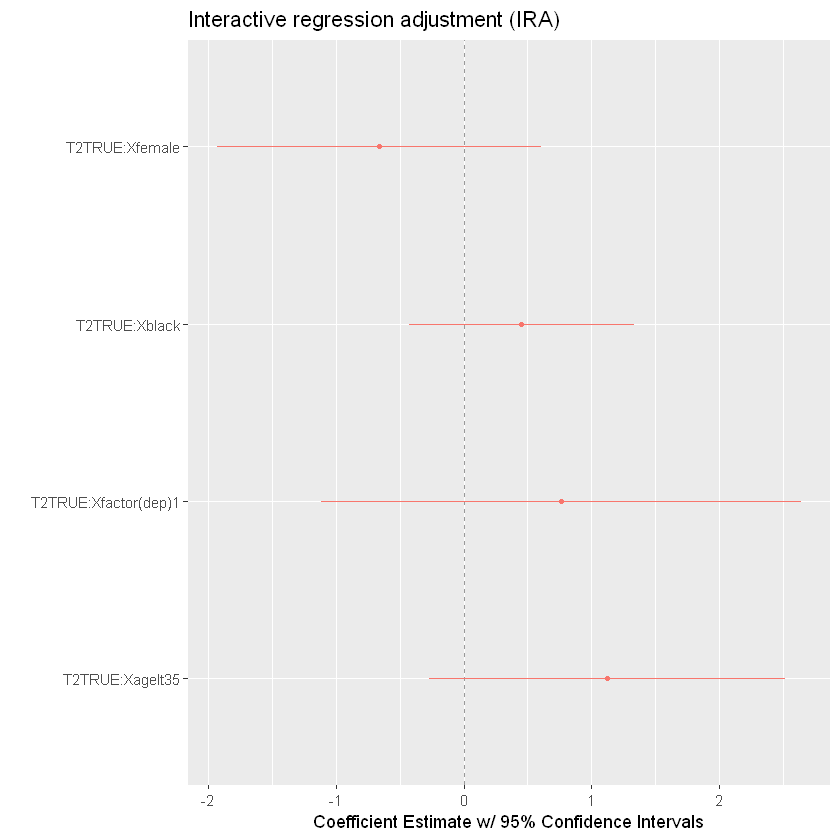

In [13]:
dwplot(list(ols.ira_reg), ci=.95,
        vline = geom_vline(
           xintercept = 0,
           colour = "grey60",
           linetype = 2
       ),
       vars_order = c("T2TRUE:Xfemale", "T2TRUE:Xblack", "T2TRUE:Xfactor(dep)1", "T2TRUE:Xagelt35")
       ) +
    xlab("Coefficient Estimate w/ 95% Confidence Intervals") + ylab("") +
    ggtitle("Interactive regression adjustment (IRA)") 

This graphic shows four interactive coefficients ($T2TRUE:Xfemale$, $T2TRUE:Xblack$, $T2TRUE:Xfactor(dep)1$, $T2TRUE:Xagelt35$) of the second treated group with $95%$ confidence intervals. First, the $T2TRUE:Xfemale$ coefficient of the second treated group, says that woman is $65.9\%$ less likely to be unemployed for one more week compared to a man. Additionally, the cero number lies in its confidence interval, so this coefficient is not significative. Second, the $T2TRUE:Xblack$ coefficient of the second treated group, says that an African American person is $45.26\%$ more likely to be unemployed for one more week compared to a white person. Additionally, the cero number lies in its confidence interval, so this coefficient is not significative. In third place, the $T2TRUE:Xfactor(dep)1$ coefficient of the second treated group, a person with only one dependent is $76.36\%$ more likely to be unemployed for one more week compared to a person with two or more dependents. Additionally, the cero number lies in its confidence interval, so this coefficient is not significative. Finally, the $T2TRUE:Xagelt35)$ coefficient of the second treated group, a person who is younger than 35 years of age is $112\%$ more likely to be unemployed for one more week compared to a person older than 35 years. Additionally, the cero number lies in its confidence interval, so this coefficient is not significative. In few words, all these coefficiences are no significative. 

## Extra: Graphic for Classical linear regression adjustment (CRA)

Warning message:
"Model matrix is rank deficient. Parameters black:othrace, black:q6, othrace:q6,
  q2:q3, q2:q4, q2:q5, q2:q6, q3:q4, q3:q5, q3:q6, q4:q5, q4:q6, q5:q6, q6:lusd,
  q6:husd, agelt35:agegt54, lusd:husd were not estimable."

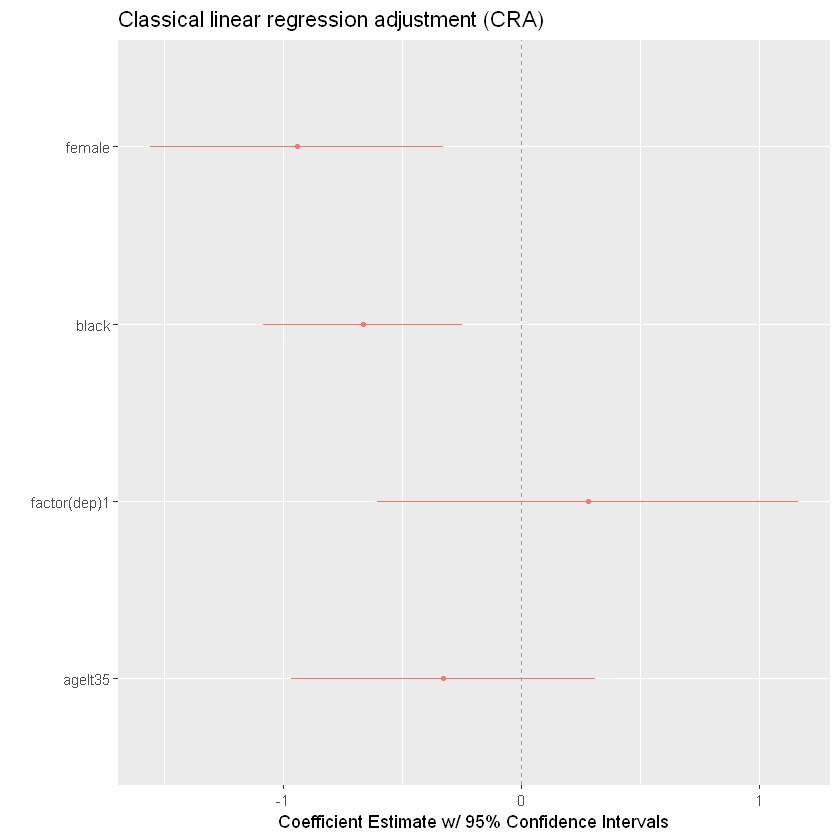

In [14]:
dwplot(list(ols.cra_reg), ci=.95,
        vline = geom_vline(
           xintercept = 0,
           colour = "grey60",
           linetype = 2
       ),
       vars_order = c("female", "black", "factor(dep)1", "agelt35")
       ) +
    xlab("Coefficient Estimate w/ 95% Confidence Intervals") + ylab("") +
    ggtitle("Classical linear regression adjustment (CRA)") 

This graphic shows that $female$ and $black$ coefficients are significative , meanwhile, $factor(dep)1$ and $agelt35$ are not significative because of its conffidence intervals. 